## Обучение без учителя (Unsupervised)

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(iris.data[:3,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


### PCA
- [Пошаговое описание на английском](https://www.youtube.com/watch?v=FgakZw6K1QQ)
- [Статья на Хабре на математичном](https://habr.com/ru/post/304214/)

![](https://github.com/Yorko/mlcourse.ai/raw/05aae6e7e582c2f17eab7f3355f97d14c2dc9f19/img/pca_good_bad_direction.png)

![](https://neerc.ifmo.ru/wiki/images/5/5a/800px-Pca_3d_to_2d_example_v2.png)

In [4]:
X, y = iris.data, iris.target
pca = PCA (n_components=2)
X_reduced = pca.fit_transform(X)


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


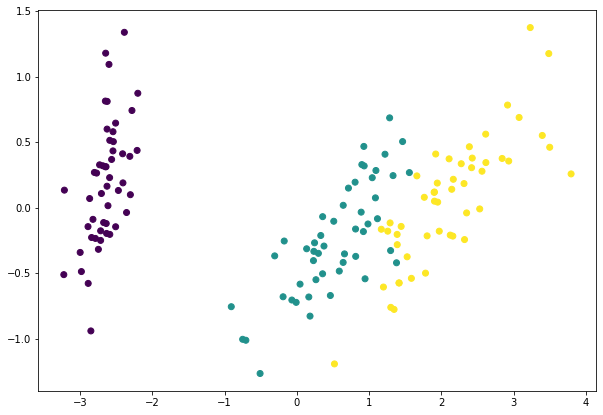

In [8]:
for component in pca.components_:
    print(' + '.join('%.3f x %s' % (value,name) for value,name in zip(component, iris.feature_names)))


plt.figure(figsize = (10,7))
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y)
plt.show()

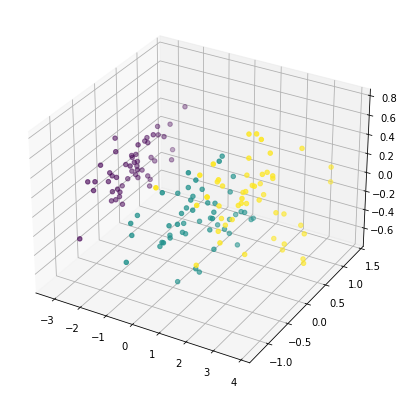

In [15]:
X_reduced = PCA (n_components=3).fit_transform(X)
x,y,z = [X_reduced[:,i] for i in range(3)]
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection="3d")
ax.scatter(x,y,z, c=iris.target)
plt.show()

### KMeans
- [Пошаговое описание на английском](https://www.youtube.com/watch?v=4b5d3muPQmA)

![](https://www.projectrhea.org/rhea/images/e/ef/RunyanKmeans.gif)

![](https://www.machinelearningmastery.ru/img/0-898077-26802.png)

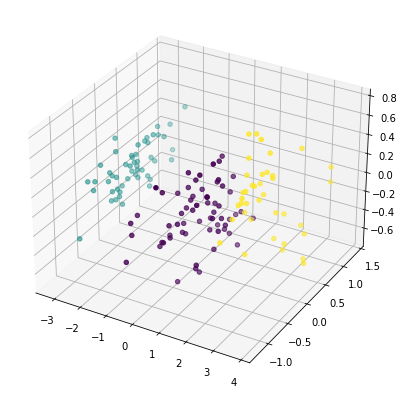

In [18]:
km = KMeans (n_clusters=3)
pred = km.fit_predict(X_reduced)

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection="3d")
ax.scatter(x,y,z, c=pred)
plt.show()

In [20]:
iris.target, pred

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2

### DBSCAN

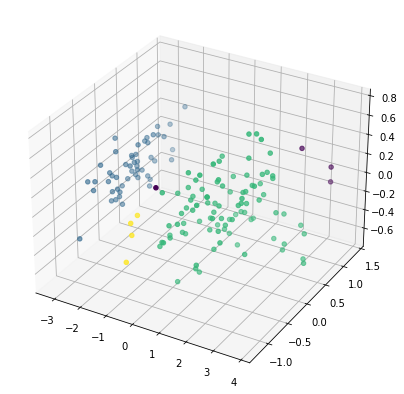

In [22]:
pred = DBSCAN(eps=0.6, min_samples=3).fit_predict(X_reduced)

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection="3d")
ax.scatter(x,y,z, c=pred)
plt.show()


In [23]:
pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [24]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

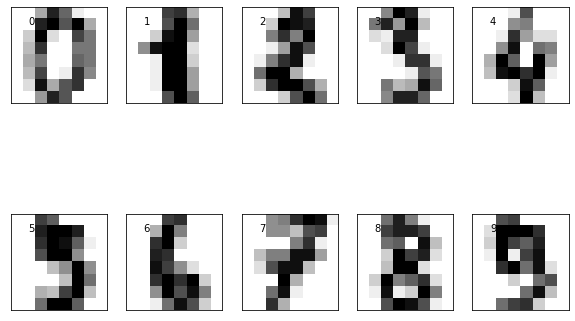

In [25]:
fig, axes = plt.subplots (2, 5, figsize = (10,7))
for i, ax in enumerate(axes.flat):
    im = X[i].reshape(1,-1)
    ax.imshow(im.reshape((8,8)), cmap='binary')
    ax.text(0.95,0.95, y[i])
    ax.set_xticks([])
    ax.set_yticks([])


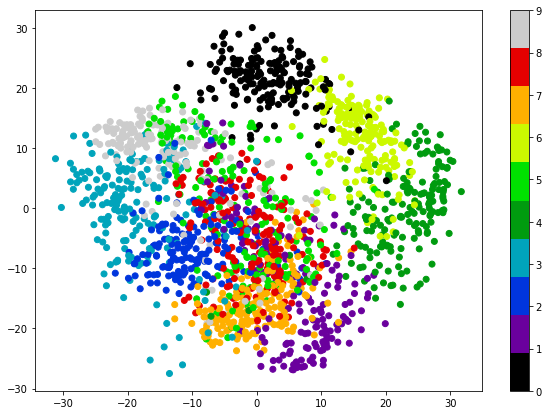

In [28]:
def plot_digits(X,y):
    plt.figure(figsize = (10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('nipy_spectral', 10))
    plt.colorbar()
    plt.show()

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plot_digits(X_reduced, y)

## t-SNE
- [Пошаговое описание на английском](https://www.youtube.com/watch?v=NEaUSP4YerM)
- [Статья на Хабре на математичном](https://habr.com/ru/post/267041/)

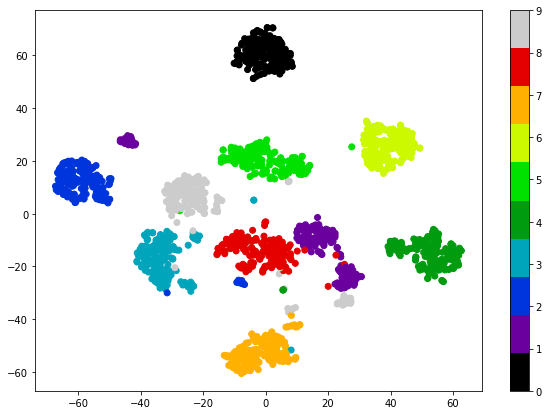

In [29]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X)
plot_digits(X_tsne, y)

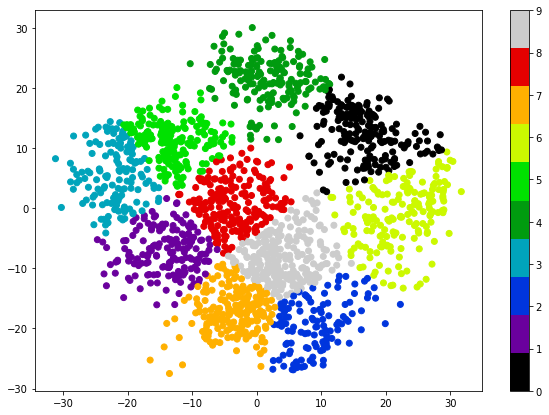

In [30]:
preds = KMeans (n_clusters=10).fit_predict(X_reduced)
plot_digits(X_reduced, preds)

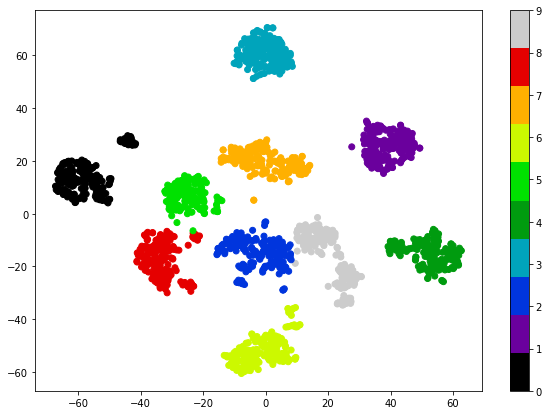

In [31]:
preds = KMeans(n_clusters=10).fit_predict(X_tsne)
plot_digits(X_tsne, preds)

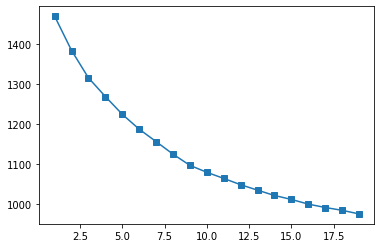

In [33]:
import numpy as np

inertia = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=17).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1,20), inertia, marker='s')

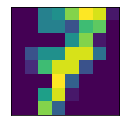

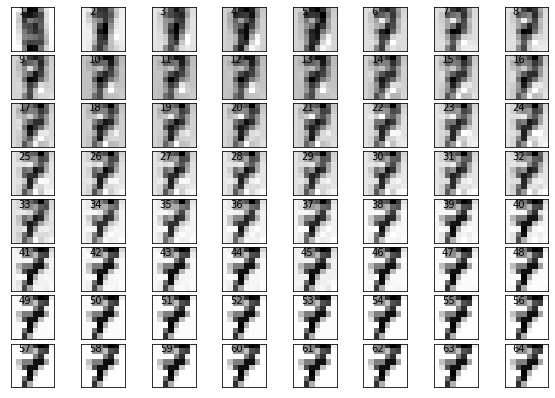

In [47]:
number = 7
plt.figure(figsize=(4,2))
plt.imshow(X[number].reshape(8,8))
plt.xticks([])
plt.yticks([])
plt.show

fig, axes = plt.subplots (8, 8, figsize = (10,7))
fig.subplots_adjust(hspace=0.1,wspace=0.1)
for i, ax in enumerate(axes.flat):
    pca = PCA(i+1).fit(X)
    im = pca.inverse_transform(pca.transform(X[number].reshape(1,-1)))
    ax.imshow(im.reshape(8,8), cmap='binary')
    ax.text(0.95,0.95, i+1)
    ax.set_xticks([])
    ax.set_yticks([])

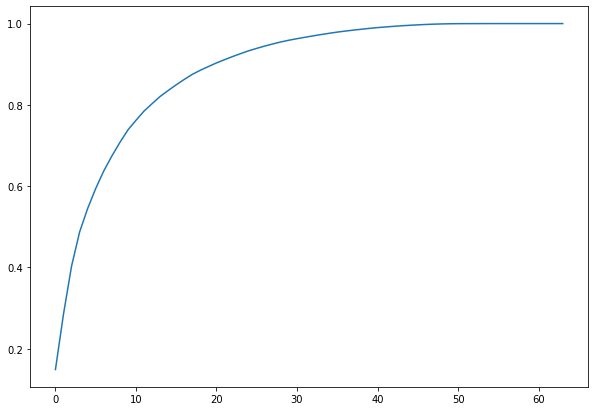

In [48]:
import numpy as np
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [50]:
pca = PCA(0.9).fit(X)
pca.n_components_

21

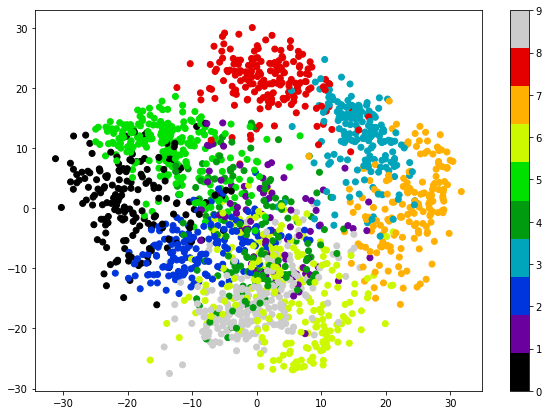

In [52]:
pca = PCA(n_components=21)
X_pca = pca.fit_transform(X)
km = KMeans(n_clusters=10)
preds = km.fit_predict(X_pca)
plot_digits(X_reduced, preds)

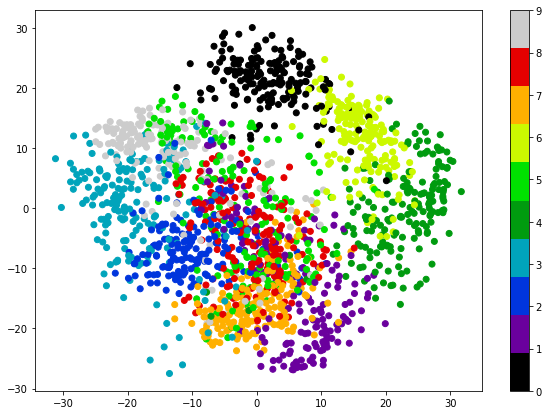

In [53]:
plot_digits(X_reduced, y)

🛠 Сократить число признаков данных клиентов банка до 3 признаков (предварительно нормализовав данные) с помощью PCA или t-SNE, сделать кластеризацию без учёта целевого признака Geography на 3 кластера. Визуально отобразить данные.

In [55]:
import pandas as pd
df = pd.read_csv('../data/bank.csv')
X,y= df.drop(columns = ['Geography']), df['Geography']
df.head()
# Ваш код здесь

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


🛠 Найти аномальных клиентов среди всех данных с помощью DBSCAN.

In [ ]:
# Ваш код здесь